# Lista de Exercícios II

* Aluno : Gabriel Wendell Celestino Rocha
* Matrícula : 20190112149 

* Disciplina : Física Computacional I
* Professor : Leonardo Machado
* Data de Entrega : 16/09/2020

In [2]:
import matplotlib.pyplot as plt
import pylab as py
import numpy as np

%matplotlib notebook

$\text{}$

## Problema 1

### Letra a)

Deseja-se calcular a integral abaixo para valores de $x\in[0,3]$ com o passo de 0.1.  

$$E(x)=\int_{0}^{x}e^{-t^{2}}dt$$

Para isso, vamos utilizar o método de Simpson para integração numérica.

Primeiramente, vamos criar uma função `E(t)` que retorna a função que estamos integrando $(e^{-t^{2}})$. Em seguida, vamos definir um array que indo de 0 até 3 com passo igual a 0.1. 

In [3]:
def E(t):
    return np.exp(-t**2)

Agora vamos definir a função `simpson` que implementa o método de Simpsom.

In [4]:
def simpson(x):
    a = 0
    b = x
    n_slices = 5000
    h = (b-a)/n_slices
    
    odd_sum = 0
    for k in range(1, n_slices, 2):
        odd_sum += E(a+k*h)

    even_sum = 0
    for k in range(2, n_slices, 2):
        even_sum += E(a+k*h)

    return (1/3)*h*(E(a)+E(b)+4*odd_sum+2*even_sum)

Vamos agora definir os pontos que serão plotados em cada eixo e também ver os valores de nossa integração!

In [5]:
points = np.linspace(0,3,100)
values = np.array(list(map(simpson,points)))

print(values)

[0.         0.03029376 0.06053194 0.09065927 0.1206211  0.15036366
 0.17983439 0.20898221 0.23775776 0.26611369 0.29400485 0.32138852
 0.34822462 0.37447586 0.40010785 0.42508931 0.44939206 0.47299118
 0.495865   0.51799513 0.53936648 0.55996719 0.57978863 0.59882529
 0.61707469 0.63453729 0.65121637 0.66711785 0.68225017 0.69662412
 0.71025266 0.72315073 0.7353351  0.74682413 0.75763764 0.76779668
 0.77732333 0.78624059 0.79457212 0.8023421  0.8095751  0.81629588
 0.82252924 0.82829994 0.83363251 0.83855118 0.84307975 0.84724151
 0.85105916 0.85455471 0.85774948 0.86066399 0.86331795 0.86573022
 0.86791878 0.86990074 0.87169231 0.87330881 0.87476466 0.87607343
 0.87724783 0.8782997  0.87924011 0.88007933 0.88082687 0.88149152
 0.88208139 0.88260394 0.88306599 0.88347381 0.88383309 0.88414904
 0.88442637 0.88466935 0.88488185 0.88506735 0.88522898 0.88536956
 0.88549161 0.88559737 0.88568885 0.88576783 0.88583589 0.88589444
 0.88594471 0.8859878  0.88602466 0.88605614 0.88608297 0.8861

Criamos aqui uma função chamada `opt_plot` com o intuito de melhorar a estética dos plots.

In [6]:
def opt_plot():
        plt.minorticks_on()
        plt.tick_params(axis='both',which='minor', direction = "in",
                        top = True,right = True, length=5,width=1,labelsize=15)
        plt.tick_params(axis='both',which='major', direction = "in",
                        top = True,right = True, length=8,width=1,labelsize=15)

Vamos agora construir um gráfico do tipo $E(x)$ vs $x$

<IPython.core.display.Javascript object>


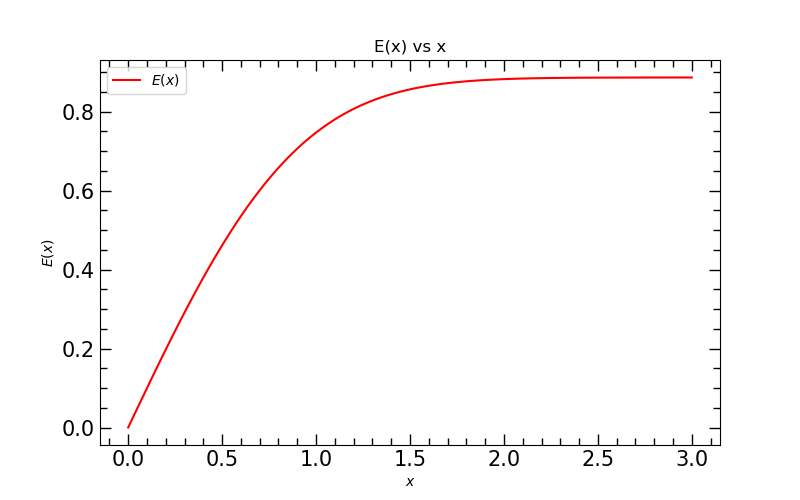

In [7]:
plt.figure(figsize=(8,5))
plt.plot(points,values,'r-',label=r'$E(x)$')
plt.title('E(x) vs x')
plt.xlabel(r'$x$')
plt.ylabel(r'$E(x)$')
plt.legend(loc='best')

opt_plot()

$\text{}$

## Problema 2

### Letra a)

Vamos criar uma função `J(m,x)` que irá calcular os valores de $J_{m}(x)$ usando a regra de Simpson com um número de pontos igual a $N=1000$, onde a função $J_{m}(x)$ é chamada de função de Bessel e é definida como:

$$J_{m}(x)=\frac{1}{\pi}\int_{0}^{\pi}\cos{(m\theta-x\sin{\theta})}d\theta$$

In [8]:
def J(m,x):
    def f(m,x,theta):
        return np.cos(m*theta-x*np.sin(theta))
    
    N = 1000
    a = 0
    b = np.pi
    h = (b-a)/N
    
    odd_sum = 0
    for k in range(1,N,2):
        odd_sum += f(m,x,a+k*h)
        
    even_sum = 0
    for k in range(1,N,2):
        even_sum += f(m,x,a+k*h)
        
    return (1/np.pi)*(1/3)*h*(f(m,x,a)+f(m,x,b)+4*odd_sum+2*even_sum)

Agora vamos plotar as funções de Bessel $J_{i}$, com $i\in[0,2]$ em função de $x\in[0,20]$.

In [9]:
x_points = np.linspace(0,20,100)
J0 = []
J1 = []
J2 = []

for x in x_points:
    J0.append(J(0,x))
    J1.append(J(1,x))
    J2.append(J(2,x))

<IPython.core.display.Javascript object>


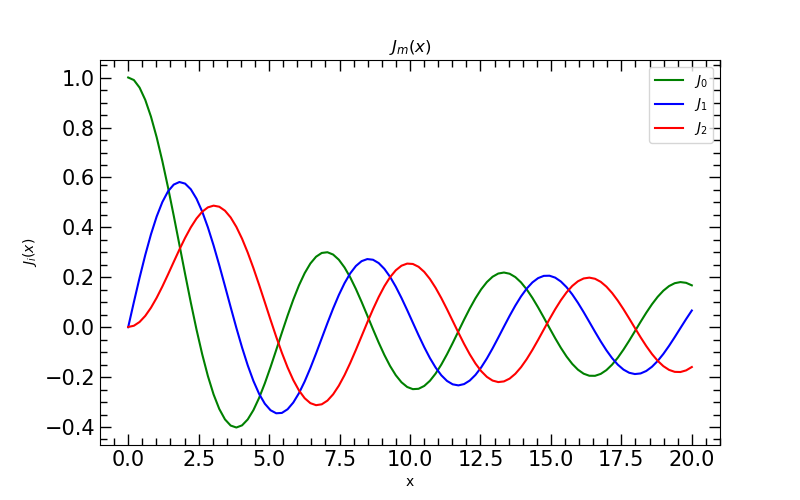

In [10]:
plt.figure(figsize=(8,5))
plt.plot(x_points,J0,'g-',label=r'$J_{0}$')
plt.plot(x_points,J1,'b-',label=r'$J_{1}$')
plt.plot(x_points,J2,'r-',label=r'$J_{2}$')
plt.title(r'$J_{m}(x)$')
plt.xlabel('x')
plt.ylabel(r'$J_{i}(x)$')
plt.legend(loc='best')

opt_plot()

### Letra b)

Nosso objetivo agora é fazer um plot de densidade do padrão de difração circular de uma fonte de luz com $\lambda=50nm$, em uma região quadrada no plano focal, com $r$ indo de 0 até $1\mu m$.

Para isso, vamos criar duas funções. A primeira será a função `r(x,y)` que irá calcular as distâncias no plano focal do centro do padrão de difração.

In [11]:
def r(x,y):
    return np.sqrt(x**2+y**2)

A segunda função, intitulada `I(r)` irá calcular a intensidade da luz nesse padrão de difração, nessa função a variável `Lambda` está medida em $\mu m$.

In [12]:
def I(r):
    if r == 0:
        return 1/4
    
    Lambda = 0.5
    kr = (2*np.pi)/Lambda*r
    
    return (J(1,kr)/kr)**2

Vamos criar três variáveis intituladas `side`, `points` e `spacing`. A primeira será o comprimento medido em $\mu m$, a segunda indicará o número de ponto de rede em cada direção e a terceira será a razão entre o comprimento e o número de pontos.

In [13]:
side = 2
points = 200
spacing = side/points

Definimos agora a posição do centro:

In [14]:
x_center = side/2
y_center = side/2

Agora criamos um array vázio apenas para armazenar os valores que serão calculados posteriormente

In [15]:
Ints = np.empty([points,points],float)

Agora vamos calcular os valores que serão armazenados no array e em seguida realizar o plot

<IPython.core.display.Javascript object>


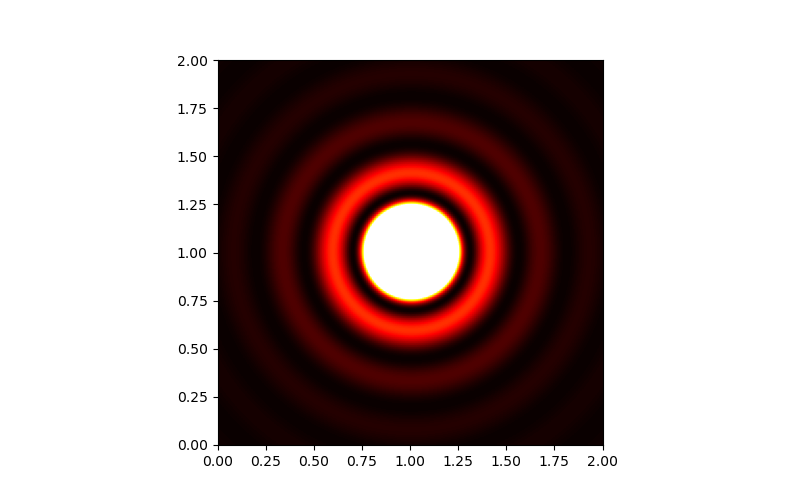

In [16]:
for i in range(points):
    y = spacing*i
    
    for j in range(points):
        x = spacing * j
        dist = r(x - x_center, y - y_center)
        Ints[i, j] = I(dist)
        
plt.figure(figsize = (8,5))
plt.imshow(Ints, origin = 'lower', extent = [0, side, 0, side], vmax = 0.01)
plt.hot()
plt.show()

$\text{}$

## Problema 3

Inicialmente, vamos usar a regra do trapézio para calcular a integral $\int_{0}^{2}(x^{4}-2x+1)dx$ utilizando 20 divisões (fatias).

Em seguida, vamos imprimir uma estimativa do erro $\epsilon$ do resultado por meio da equação $\epsilon_{2}=\frac{1}{3}(I_{2}-I_{1})$

In [22]:
def f(x):
    return x**4 - 2*x + 1

In [23]:
N1 = 20
N2 = 2*N1
a = 0
b = 2
h1 = (b-a)/N1
h2 = (b-a)/N2

Note que definimos duas variáveis `N1` e `N2` para o número de pontos e, consequentemente, duas variáveis `h1` e `h2` que relacionam as duas anteriores. Esse passo é necessário pelo fato de que para estimarmos o erro utilizando a equação $\epsilon_{2}$, precisamos avaliar a integral duas vezes, uma com $N_{1}=10$ divisões e em seguida com $N_{2}=20$ divisões.

In [51]:
f_values = sum(list(map(f,np.arange(a+h1,b,h1))))
nested_f_values = sum(list(map(f,np.arange(a+h2,b,h1))))

Agora calculamos os dois valores para a mesma integral e em seguida verificar o tempo de execução do código:

In [49]:
I1 = h1*(0.5*f(a)+0.5*f(b)+f_values)
I2 = h2*(0.5*f(a)+0.5*f(b)+f_values+nested_f_values)

In [52]:
%timeit I1
%timeit I2

26 ns ± 0.257 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
27.6 ns ± 0.258 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


Vamos agora definir $\epsilon$ utilizando a equação mencionada anteriormente:

In [50]:
epsilon = (1/3)*(I2-I1)

Finalmente, imprimimos os valores da integral, o erro e a correção no valor da integral:

In [52]:
print('10 divisões:',I1)
print('20 divisões:',I2)
print('')
print('Erro :',epsilon)
print('')
print('Correção no valor :',I2+epsilon)

10 divisões: 4.426660000000002
20 divisões: 4.406666250000003

Erro : -0.006664583333332826

Correção no valor : 4.400001666666671


Perceba que o erro é bom somente quando temos $h^{2}$.

$\text{}$

## Problema 4

Vamos usar a regra do trapézio adaptativa para calcular o valor da integral abaixo com uma precisão aproximada de até $\epsilon=10^{-6}$.

$$\int_{0}^{1}\sin^{2}{\sqrt{100x}}dx$$

Vamos começar definindo a função $f(x)=\sin^{2}{\sqrt{100x}}$ por meio da função `f(x)`. Em seguida, vamos criar uma função de nome `adap_trap` que irá implementar o método do trapézio adaptativo:

In [29]:
def f(x):
    return np.sin(np.sqrt(100*x))**2

In [30]:
def adap_trap(f,a,b,n,prev_estimate,error):
    n = 2*n
    h = (b-a)/n
    
    integral = 0.5*prev_estimate + h*sum(list(map(f,arange(a+h,b,2*h))))
    epsilon = (1/3)*(integral - prev_estimate)
    
    print('Número de divisões (fatias) :',n)
    print('Valor estimado da integral :',integral)
    print('Erro :',error)
    
    if abs(epsilon) < error:
        return integral
    else:
        return adap_trap(f,a,b,n,integral,error)

Vamos definir o passo de `adap_trap`...

In [40]:
def adap_trap_step(f,a,b,n,prev_estimate):
    n = 2*n
    h = (b-a)/n
    
    integral = 0.5*prev_estimate + h*sum(list(map(f,np.arange(a+h,b,2*h))))
    
    return integral

Agora vamos implementar o método de Romberg. \
Inicialmente, vamos definir a estimativa inicial de nossa integral com $N=2$, `R11`, e criar uma lista para manter as estimativas do método, `R_list`. 

Em seguida, vamos criar duas funções de nomes `Rij` e `romberg_step`. A função `Rij` irá receber como parâmetros as variáveis `i` (o i-ésimo passo da regra do trapézio) e `m` (a m-ésima extrapolação), ambas do tipo `int`. Essa função irá retornar um `float` que é o índice linear de $R_{ij}$ correspondente a $i,m$.

A função `romberg_step` irá receber os mesmo parâmetros `i` e `m` definidos anteriormente e também retornará um `float`. Entretanto, essa função irá retornar $R_{i,m}$ tal que a estimativa de erro é menor que o erro fornecido.

In [31]:
def romberg(f, a, b, error):
    R11 = (b - a)/(2*(0.5*f(a) + 0.5*f(b) + f(a + (b - a)/2)))
    R_list = [R11, adap_trap_step(f,a,b,2,R11)]

    def Rij(i, m):
        return R_list[int(1 / 2 * i * (i - 1) + m - 1)]  #

    def romberg_step(i, m):
        if m == 1:
            print('')
            print('i = ', i)
            print('m = ', m)
            print('')
            
            R_list.append(adap_trap_step(f, a, b, 2 ** (i - 1), Rij(i - 1, 1)))
            epsilon = 1/(3 * (Rij(i, 1) - Rij(i - 1, 1)))
            
            print('')
            print('Estimativa atual :', Rij(i, m))
            print('epsilon = ', epsilon)
            print('')
            
            if abs(epsilon) < error:
                return Rij(i, m)
            else:
                return romberg_step(i, m + 1)
            
        else:
            print('')
            print('i = ', i)
            print('m = ', m)
            print('')
            
            epsilon = 1/(4**(m - 1) - 1)*(Rij(i,m - 1) - Rij(i - 1, m - 1))
            print('epsilon = ', epsilon)
            
            R_list.append(Rij(i, m - 1) + epsilon)
            print('Estimativa atual :', Rij(i,m))
            
            if abs(epsilon) < error:
                return Rij(i, m)
            else:
                if i == m:
                    return romberg_step(i + 1, 1)
                else:
                    return romberg_step(i, m + 1)

                
    return romberg_step(2, 2)

$\textbf{OBS}:$ No ínicio da função `romberg_step` usamos o laço `if m==1:` para que, se caso $m=1$, se calcule em seguida a próxima estimativa de regra do trapézio aninhada.

In [37]:
%timeit print(romberg(f, 0, 1, 0.000001))


i =  2
m =  2

epsilon =  -0.01155807879418506
Estimativa atual : 0.7224499512285584

i =  3
m =  1


Estimativa atual : 0.5138600381279543
epsilon =  -1.5141329723899397


i =  3
m =  2

epsilon =  -0.07338266396492968
Estimativa atual : 0.4404773741630247

i =  3
m =  3

epsilon =  -0.018798171804368914
Estimativa atual : 0.42167920235865575

i =  4
m =  1


Estimativa atual : 0.4855346641196
epsilon =  -11.768011721046276


i =  4
m =  2

epsilon =  -0.00944179133611811
Estimativa atual : 0.4760928727834819

i =  4
m =  3

epsilon =  0.0023743665746971472
Estimativa atual : 0.47846723935817903

i =  4
m =  4

epsilon =  0.0009013974126908458
Estimativa atual : 0.4793686367708699

i =  5
m =  1


Estimativa atual : 0.47613031319989646
epsilon =  -35.44458689168536


i =  5
m =  2

epsilon =  -0.00313478363990118
Estimativa atual : 0.4729955295599953

i =  5
m =  3

epsilon =  -0.0002064895482324395
Estimativa atual : 0.47278904001176286

i =  5
m =  4

epsilon =  -9.013014835581219e

Estimativa atual : 0.45794565753505195

i =  8
m =  6

epsilon =  -2.0656159291772635e-06
Estimativa atual : 0.45794359191912276

i =  8
m =  7

epsilon =  -5.155212676800678e-07
Estimativa atual : 0.4579430763978551
0.4579430763978551

i =  2
m =  2

epsilon =  -0.01155807879418506
Estimativa atual : 0.7224499512285584

i =  3
m =  1


Estimativa atual : 0.5138600381279543
epsilon =  -1.5141329723899397


i =  3
m =  2

epsilon =  -0.07338266396492968
Estimativa atual : 0.4404773741630247

i =  3
m =  3

epsilon =  -0.018798171804368914
Estimativa atual : 0.42167920235865575

i =  4
m =  1


Estimativa atual : 0.4855346641196
epsilon =  -11.768011721046276


i =  4
m =  2

epsilon =  -0.00944179133611811
Estimativa atual : 0.4760928727834819

i =  4
m =  3

epsilon =  0.0023743665746971472
Estimativa atual : 0.47846723935817903

i =  4
m =  4

epsilon =  0.0009013974126908458
Estimativa atual : 0.4793686367708699

i =  5
m =  1


Estimativa atual : 0.47613031319989646
epsilon =  -35.4

epsilon =  -3.2867152881243e-05
Estimativa atual : 0.46428491872580885

i =  6
m =  6

epsilon =  -8.199252537443039e-06
Estimativa atual : 0.4642767194732714

i =  7
m =  1


Estimativa atual : 0.46227741622590873
epsilon =  -60.67955241781234


i =  7
m =  2

epsilon =  -0.0018311128985601202
Estimativa atual : 0.4604463033273486

i =  7
m =  3

epsilon =  -0.00030252881120920174
Estimativa atual : 0.4601437745161394

i =  7
m =  4

epsilon =  -6.835515410126932e-05
Estimativa atual : 0.46007541936203816

i =  7
m =  5

epsilon =  -1.663673143785075e-05
Estimativa atual : 0.4600587826306003

i =  7
m =  6

epsilon =  -4.131120327672097e-06
Estimativa atual : 0.46005465151027264

i =  7
m =  7

epsilon =  -1.0310300275943316e-06
Estimativa atual : 0.46005362048024506

i =  8
m =  1


Estimativa atual : 0.4591757223797943
epsilon =  -107.46816090534202


i =  8
m =  2

epsilon =  -0.0010338979487048057
Estimativa atual : 0.45814182443108953

i =  8
m =  3

epsilon =  -0.000153631926417



Estimativa atual : 0.46227741622590873
epsilon =  -60.67955241781234


i =  7
m =  2

epsilon =  -0.0018311128985601202
Estimativa atual : 0.4604463033273486

i =  7
m =  3

epsilon =  -0.00030252881120920174
Estimativa atual : 0.4601437745161394

i =  7
m =  4

epsilon =  -6.835515410126932e-05
Estimativa atual : 0.46007541936203816

i =  7
m =  5

epsilon =  -1.663673143785075e-05
Estimativa atual : 0.4600587826306003

i =  7
m =  6

epsilon =  -4.131120327672097e-06
Estimativa atual : 0.46005465151027264

i =  7
m =  7

epsilon =  -1.0310300275943316e-06
Estimativa atual : 0.46005362048024506

i =  8
m =  1


Estimativa atual : 0.4591757223797943
epsilon =  -107.46816090534202


i =  8
m =  2

epsilon =  -0.0010338979487048057
Estimativa atual : 0.45814182443108953

i =  8
m =  3

epsilon =  -0.00015363192641727104
Estimativa atual : 0.45798819250467226

i =  8
m =  4

epsilon =  -3.421558748360555e-05
Estimativa atual : 0.45795397691718864

i =  8
m =  5

epsilon =  -8.3193821366

m =  2

epsilon =  -0.00313478363990118
Estimativa atual : 0.4729955295599953

i =  5
m =  3

epsilon =  -0.0002064895482324395
Estimativa atual : 0.47278904001176286

i =  5
m =  4

epsilon =  -9.013014835581219e-05
Estimativa atual : 0.47269890986340707

i =  5
m =  5

epsilon =  -2.615579179397182e-05
Estimativa atual : 0.4726727540716131

i =  6
m =  1


Estimativa atual : 0.4677707549215891
epsilon =  -39.87451516407471


i =  6
m =  2

epsilon =  -0.0027865194261024553
Estimativa atual : 0.4649842354954866

i =  6
m =  3

epsilon =  -0.0005340862709672452
Estimativa atual : 0.4644501492245194

i =  6
m =  4

epsilon =  -0.00013236334582926158
Estimativa atual : 0.4643177858786901

i =  6
m =  5

epsilon =  -3.2867152881243e-05
Estimativa atual : 0.46428491872580885

i =  6
m =  6

epsilon =  -8.199252537443039e-06
Estimativa atual : 0.4642767194732714

i =  7
m =  1


Estimativa atual : 0.46227741622590873
epsilon =  -60.67955241781234


i =  7
m =  2

epsilon =  -0.0018311128985

epsilon =  -0.0005340862709672452
Estimativa atual : 0.4644501492245194

i =  6
m =  4

epsilon =  -0.00013236334582926158
Estimativa atual : 0.4643177858786901

i =  6
m =  5

epsilon =  -3.2867152881243e-05
Estimativa atual : 0.46428491872580885

i =  6
m =  6

epsilon =  -8.199252537443039e-06
Estimativa atual : 0.4642767194732714

i =  7
m =  1


Estimativa atual : 0.46227741622590873
epsilon =  -60.67955241781234


i =  7
m =  2

epsilon =  -0.0018311128985601202
Estimativa atual : 0.4604463033273486

i =  7
m =  3

epsilon =  -0.00030252881120920174
Estimativa atual : 0.4601437745161394

i =  7
m =  4

epsilon =  -6.835515410126932e-05
Estimativa atual : 0.46007541936203816

i =  7
m =  5

epsilon =  -1.663673143785075e-05
Estimativa atual : 0.4600587826306003

i =  7
m =  6

epsilon =  -4.131120327672097e-06
Estimativa atual : 0.46005465151027264

i =  7
m =  7

epsilon =  -1.0310300275943316e-06
Estimativa atual : 0.46005362048024506

i =  8
m =  1


Estimativa atual : 0.459175


epsilon =  -5.155212676800678e-07
Estimativa atual : 0.4579430763978551
0.4579430763978551

i =  2
m =  2

epsilon =  -0.01155807879418506
Estimativa atual : 0.7224499512285584

i =  3
m =  1


Estimativa atual : 0.5138600381279543
epsilon =  -1.5141329723899397


i =  3
m =  2

epsilon =  -0.07338266396492968
Estimativa atual : 0.4404773741630247

i =  3
m =  3

epsilon =  -0.018798171804368914
Estimativa atual : 0.42167920235865575

i =  4
m =  1


Estimativa atual : 0.4855346641196
epsilon =  -11.768011721046276


i =  4
m =  2

epsilon =  -0.00944179133611811
Estimativa atual : 0.4760928727834819

i =  4
m =  3

epsilon =  0.0023743665746971472
Estimativa atual : 0.47846723935817903

i =  4
m =  4

epsilon =  0.0009013974126908458
Estimativa atual : 0.4793686367708699

i =  5
m =  1


Estimativa atual : 0.47613031319989646
epsilon =  -35.44458689168536


i =  5
m =  2

epsilon =  -0.00313478363990118
Estimativa atual : 0.4729955295599953

i =  5
m =  3

epsilon =  -0.0002064895482

m =  2

epsilon =  -0.01155807879418506
Estimativa atual : 0.7224499512285584

i =  3
m =  1


Estimativa atual : 0.5138600381279543
epsilon =  -1.5141329723899397


i =  3
m =  2

epsilon =  -0.07338266396492968
Estimativa atual : 0.4404773741630247

i =  3
m =  3

epsilon =  -0.018798171804368914
Estimativa atual : 0.42167920235865575

i =  4
m =  1


Estimativa atual : 0.4855346641196
epsilon =  -11.768011721046276


i =  4
m =  2

epsilon =  -0.00944179133611811
Estimativa atual : 0.4760928727834819

i =  4
m =  3

epsilon =  0.0023743665746971472
Estimativa atual : 0.47846723935817903

i =  4
m =  4

epsilon =  0.0009013974126908458
Estimativa atual : 0.4793686367708699

i =  5
m =  1


Estimativa atual : 0.47613031319989646
epsilon =  -35.44458689168536


i =  5
m =  2

epsilon =  -0.00313478363990118
Estimativa atual : 0.4729955295599953

i =  5
m =  3

epsilon =  -0.0002064895482324395
Estimativa atual : 0.47278904001176286

i =  5
m =  4

epsilon =  -9.013014835581219e-05
Esti

epsilon =  -6.835515410126932e-05
Estimativa atual : 0.46007541936203816

i =  7
m =  5

epsilon =  -1.663673143785075e-05
Estimativa atual : 0.4600587826306003

i =  7
m =  6

epsilon =  -4.131120327672097e-06
Estimativa atual : 0.46005465151027264

i =  7
m =  7

epsilon =  -1.0310300275943316e-06
Estimativa atual : 0.46005362048024506

i =  8
m =  1


Estimativa atual : 0.4591757223797943
epsilon =  -107.46816090534202


i =  8
m =  2

epsilon =  -0.0010338979487048057
Estimativa atual : 0.45814182443108953

i =  8
m =  3

epsilon =  -0.00015363192641727104
Estimativa atual : 0.45798819250467226

i =  8
m =  4

epsilon =  -3.421558748360555e-05
Estimativa atual : 0.45795397691718864

i =  8
m =  5

epsilon =  -8.319382136664783e-06
Estimativa atual : 0.45794565753505195

i =  8
m =  6

epsilon =  -2.0656159291772635e-06
Estimativa atual : 0.45794359191912276

i =  8
m =  7

epsilon =  -5.155212676800678e-07
Estimativa atual : 0.4579430763978551
0.4579430763978551

i =  2
m =  2

eps

m =  6

epsilon =  -8.199252537443039e-06
Estimativa atual : 0.4642767194732714

i =  7
m =  1


Estimativa atual : 0.46227741622590873
epsilon =  -60.67955241781234


i =  7
m =  2

epsilon =  -0.0018311128985601202
Estimativa atual : 0.4604463033273486

i =  7
m =  3

epsilon =  -0.00030252881120920174
Estimativa atual : 0.4601437745161394

i =  7
m =  4

epsilon =  -6.835515410126932e-05
Estimativa atual : 0.46007541936203816

i =  7
m =  5

epsilon =  -1.663673143785075e-05
Estimativa atual : 0.4600587826306003

i =  7
m =  6

epsilon =  -4.131120327672097e-06
Estimativa atual : 0.46005465151027264

i =  7
m =  7

epsilon =  -1.0310300275943316e-06
Estimativa atual : 0.46005362048024506

i =  8
m =  1


Estimativa atual : 0.4591757223797943
epsilon =  -107.46816090534202


i =  8
m =  2

epsilon =  -0.0010338979487048057
Estimativa atual : 0.45814182443108953

i =  8
m =  3

epsilon =  -0.00015363192641727104
Estimativa atual : 0.45798819250467226

i =  8
m =  4

epsilon =  -3.4215


Estimativa atual : 0.46227741622590873
epsilon =  -60.67955241781234


i =  7
m =  2

epsilon =  -0.0018311128985601202
Estimativa atual : 0.4604463033273486

i =  7
m =  3

epsilon =  -0.00030252881120920174
Estimativa atual : 0.4601437745161394

i =  7
m =  4

epsilon =  -6.835515410126932e-05
Estimativa atual : 0.46007541936203816

i =  7
m =  5

epsilon =  -1.663673143785075e-05
Estimativa atual : 0.4600587826306003

i =  7
m =  6

epsilon =  -4.131120327672097e-06
Estimativa atual : 0.46005465151027264

i =  7
m =  7

epsilon =  -1.0310300275943316e-06
Estimativa atual : 0.46005362048024506

i =  8
m =  1


Estimativa atual : 0.4591757223797943
epsilon =  -107.46816090534202


i =  8
m =  2

epsilon =  -0.0010338979487048057
Estimativa atual : 0.45814182443108953

i =  8
m =  3

epsilon =  -0.00015363192641727104
Estimativa atual : 0.45798819250467226

i =  8
m =  4

epsilon =  -3.421558748360555e-05
Estimativa atual : 0.45795397691718864

i =  8
m =  5

epsilon =  -8.31938213666

m =  3

epsilon =  -0.0002064895482324395
Estimativa atual : 0.47278904001176286

i =  5
m =  4

epsilon =  -9.013014835581219e-05
Estimativa atual : 0.47269890986340707

i =  5
m =  5

epsilon =  -2.615579179397182e-05
Estimativa atual : 0.4726727540716131

i =  6
m =  1


Estimativa atual : 0.4677707549215891
epsilon =  -39.87451516407471


i =  6
m =  2

epsilon =  -0.0027865194261024553
Estimativa atual : 0.4649842354954866

i =  6
m =  3

epsilon =  -0.0005340862709672452
Estimativa atual : 0.4644501492245194

i =  6
m =  4

epsilon =  -0.00013236334582926158
Estimativa atual : 0.4643177858786901

i =  6
m =  5

epsilon =  -3.2867152881243e-05
Estimativa atual : 0.46428491872580885

i =  6
m =  6

epsilon =  -8.199252537443039e-06
Estimativa atual : 0.4642767194732714

i =  7
m =  1


Estimativa atual : 0.46227741622590873
epsilon =  -60.67955241781234


i =  7
m =  2

epsilon =  -0.0018311128985601202
Estimativa atual : 0.4604463033273486

i =  7
m =  3

epsilon =  -0.00030252881


epsilon =  -8.199252537443039e-06
Estimativa atual : 0.4642767194732714

i =  7
m =  1


Estimativa atual : 0.46227741622590873
epsilon =  -60.67955241781234


i =  7
m =  2

epsilon =  -0.0018311128985601202
Estimativa atual : 0.4604463033273486

i =  7
m =  3

epsilon =  -0.00030252881120920174
Estimativa atual : 0.4601437745161394

i =  7
m =  4

epsilon =  -6.835515410126932e-05
Estimativa atual : 0.46007541936203816

i =  7
m =  5

epsilon =  -1.663673143785075e-05
Estimativa atual : 0.4600587826306003

i =  7
m =  6

epsilon =  -4.131120327672097e-06
Estimativa atual : 0.46005465151027264

i =  7
m =  7

epsilon =  -1.0310300275943316e-06
Estimativa atual : 0.46005362048024506

i =  8
m =  1


Estimativa atual : 0.4591757223797943
epsilon =  -107.46816090534202


i =  8
m =  2

epsilon =  -0.0010338979487048057
Estimativa atual : 0.45814182443108953

i =  8
m =  3

epsilon =  -0.00015363192641727104
Estimativa atual : 0.45798819250467226

i =  8
m =  4

epsilon =  -3.42155874836

i =  5
m =  2

epsilon =  -0.00313478363990118
Estimativa atual : 0.4729955295599953

i =  5
m =  3

epsilon =  -0.0002064895482324395
Estimativa atual : 0.47278904001176286

i =  5
m =  4

epsilon =  -9.013014835581219e-05
Estimativa atual : 0.47269890986340707

i =  5
m =  5

epsilon =  -2.615579179397182e-05
Estimativa atual : 0.4726727540716131

i =  6
m =  1


Estimativa atual : 0.4677707549215891
epsilon =  -39.87451516407471


i =  6
m =  2

epsilon =  -0.0027865194261024553
Estimativa atual : 0.4649842354954866

i =  6
m =  3

epsilon =  -0.0005340862709672452
Estimativa atual : 0.4644501492245194

i =  6
m =  4

epsilon =  -0.00013236334582926158
Estimativa atual : 0.4643177858786901

i =  6
m =  5

epsilon =  -3.2867152881243e-05
Estimativa atual : 0.46428491872580885

i =  6
m =  6

epsilon =  -8.199252537443039e-06
Estimativa atual : 0.4642767194732714

i =  7
m =  1


Estimativa atual : 0.46227741622590873
epsilon =  -60.67955241781234


i =  7
m =  2

epsilon =  -0.001831

Estimativa atual : 0.4643177858786901

i =  6
m =  5

epsilon =  -3.2867152881243e-05
Estimativa atual : 0.46428491872580885

i =  6
m =  6

epsilon =  -8.199252537443039e-06
Estimativa atual : 0.4642767194732714

i =  7
m =  1


Estimativa atual : 0.46227741622590873
epsilon =  -60.67955241781234


i =  7
m =  2

epsilon =  -0.0018311128985601202
Estimativa atual : 0.4604463033273486

i =  7
m =  3

epsilon =  -0.00030252881120920174
Estimativa atual : 0.4601437745161394

i =  7
m =  4

epsilon =  -6.835515410126932e-05
Estimativa atual : 0.46007541936203816

i =  7
m =  5

epsilon =  -1.663673143785075e-05
Estimativa atual : 0.4600587826306003

i =  7
m =  6

epsilon =  -4.131120327672097e-06
Estimativa atual : 0.46005465151027264

i =  7
m =  7

epsilon =  -1.0310300275943316e-06
Estimativa atual : 0.46005362048024506

i =  8
m =  1


Estimativa atual : 0.4591757223797943
epsilon =  -107.46816090534202


i =  8
m =  2

epsilon =  -0.0010338979487048057
Estimativa atual : 0.458141824

Estimativa atual : 0.46227741622590873
epsilon =  -60.67955241781234


i =  7
m =  2

epsilon =  -0.0018311128985601202
Estimativa atual : 0.4604463033273486

i =  7
m =  3

epsilon =  -0.00030252881120920174
Estimativa atual : 0.4601437745161394

i =  7
m =  4

epsilon =  -6.835515410126932e-05
Estimativa atual : 0.46007541936203816

i =  7
m =  5

epsilon =  -1.663673143785075e-05
Estimativa atual : 0.4600587826306003

i =  7
m =  6

epsilon =  -4.131120327672097e-06
Estimativa atual : 0.46005465151027264

i =  7
m =  7

epsilon =  -1.0310300275943316e-06
Estimativa atual : 0.46005362048024506

i =  8
m =  1


Estimativa atual : 0.4591757223797943
epsilon =  -107.46816090534202


i =  8
m =  2

epsilon =  -0.0010338979487048057
Estimativa atual : 0.45814182443108953

i =  8
m =  3

epsilon =  -0.00015363192641727104
Estimativa atual : 0.45798819250467226

i =  8
m =  4

epsilon =  -3.421558748360555e-05
Estimativa atual : 0.45795397691718864

i =  8
m =  5

epsilon =  -8.319382136664

i =  7
m =  7

epsilon =  -1.0310300275943316e-06
Estimativa atual : 0.46005362048024506

i =  8
m =  1


Estimativa atual : 0.4591757223797943
epsilon =  -107.46816090534202


i =  8
m =  2

epsilon =  -0.0010338979487048057
Estimativa atual : 0.45814182443108953

i =  8
m =  3

epsilon =  -0.00015363192641727104
Estimativa atual : 0.45798819250467226

i =  8
m =  4

epsilon =  -3.421558748360555e-05
Estimativa atual : 0.45795397691718864

i =  8
m =  5

epsilon =  -8.319382136664783e-06
Estimativa atual : 0.45794565753505195

i =  8
m =  6

epsilon =  -2.0656159291772635e-06
Estimativa atual : 0.45794359191912276

i =  8
m =  7

epsilon =  -5.155212676800678e-07
Estimativa atual : 0.4579430763978551
0.4579430763978551

i =  2
m =  2

epsilon =  -0.01155807879418506
Estimativa atual : 0.7224499512285584

i =  3
m =  1


Estimativa atual : 0.5138600381279543
epsilon =  -1.5141329723899397


i =  3
m =  2

epsilon =  -0.07338266396492968
Estimativa atual : 0.4404773741630247

i =  3
m =